### build a basic chatbot with langgraph(Graph api)

In [7]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END

from langgraph.graph.message import add_messages



### create state

In [8]:
class State(TypedDict):
    #messages have to the type "list" the add_message function
    messages:Annotated[list,add_messages]


graph_builder=StateGraph(State)

In [9]:
import os 
from dotenv import load_dotenv
load_dotenv()


True

In [11]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm=ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

In [12]:
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000027CE736F0E0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000027CE736F770>, model_name='meta-llama/llama-4-scout-17b-16e-instruct', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [14]:
llm=init_chat_model("groq:meta-llama/llama-4-scout-17b-16e-instruct")
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000027CE749D1D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000027CE749DBD0>, model_name='meta-llama/llama-4-scout-17b-16e-instruct', model_kwargs={}, groq_api_key=SecretStr('**********'))

### node functionality

In [15]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

### building graph

In [17]:
graph_builder=StateGraph(State)

#add nodes
graph_builder.add_node("llmchatbot",chatbot)

#add edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

#Compile the graph
graph=graph_builder.compile()

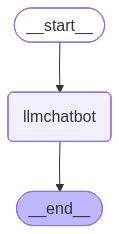

In [18]:
from IPython.display import display,Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    pass

In [22]:
response=graph.invoke({"messages":["Hello, who are you?"]})

In [26]:
response["messages"][-1].content

"I'm an AI assistant designed by Meta. I'm here to answer your questions, share interesting ideas and maybe even surprise you with a fresh perspective. What's on your mind?"

In [29]:
for event in graph.stream({"messages":"Hello How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

Hello! I'm just a language model, I don't have feelings like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have! How can I assist you today?
